<a href="https://colab.research.google.com/github/MCM-2002/ChatBot-Challenge-By-NisalGunawardhana/blob/main/student_expensess_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')



In [4]:
# Step 3: Set up plotting style
plt.style.use('default')
rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Step 4: Upload your file to Colab
from google.colab import files
uploaded = files.upload()

# Step 5: Load the data (replace with your actual filename)
import io
filename = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_excel(io.BytesIO(uploaded[filename]))



Saving Monthly Expenditures of Undergraduates at Faculty of Science, University of Kelaniya (Responses).xlsx to Monthly Expenditures of Undergraduates at Faculty of Science, University of Kelaniya (Responses).xlsx


In [6]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())




Dataset Shape: (269, 24)

Columns: ['Which district are you from?  ', 'Age  ', 'Gender  ', 'Academic Year in the Faculty of Science  ', 'Living Arrangement  ', 'Relationship Status  ', 'Rent/Housing (Hostel, Boarding charges):  ', 'Food:  ', 'Transport:  ', 'Academic Expenses (e.g., books, lab supplies)  ', 'Social/Entertainment:  ', 'Personal Care:  ', 'Other (please specify):    ', 'What is your approximate total monthly expenditure? \n(RS.) ', 'How do you obtain funds for your monthly expenses? (Select all that apply)  ', 'On average, how much do you receive monthly from  income source?  ', 'Do you currently receive any scholarships or bursaries?  ', 'If yes, please specify the type of scholarship/bursary you receive ', 'If yes,  What is the approximate amount you receive monthly from your scholarship/bursary?  ', 'If yes,  How would you rate the sufficiency of your scholarship/bursary amount in covering your educational expenses?  ', 'If you did not receive any scholarships, do you

In [13]:
# Step 6: Data Cleaning and Preparation
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('<br>', '').str.replace('(', '').str.replace(')', '')

# Rename specific columns for easier access
column_mapping = {
    'which_district_are_you_from?': 'district',
    'age': 'age',
    'gender': 'gender',
    'academic_year_in_the_faculty_of_science': 'academic_year',
    'living_arrangement': 'living_arrangement',
    'relationship_status': 'relationship_status',
    'rent/housing_hostel,_boarding_charges:': 'rent',
    'food:': 'food',
    'transport:': 'transport',
    'academic_expenses_e.g.,_books,_lab_supplies': 'academic_expenses',
    'social/entertainment:': 'entertainment',
    'personal_care:': 'personal_care',
    'other_please_specify:': 'other_expenses',
    'what_is_your_approximate_total_monthly_expenditure?_\nrs.': 'total_expenditure',
    'how_do_you_obtain_funds_for_your_monthly_expenses?_select_all_that_apply': 'funding_sources',
    'on_average,_how_much_do_you_receive_monthly_from__income_source?': 'monthly_income',
    'do_you_currently_receive_any_scholarships_or_bursaries?': 'has_scholarship',
    'if_yes,_please_specify_the_type_of_scholarship/bursary_you_receive': 'scholarship_type',
    'if_yes,__what_is_the_approximate_amount_you_receive_monthly_from_your_scholarship/bursary?': 'scholarship_amount',
    'if_yes,__how_would_you_rate_the_sufficiency_of_your_scholarship/bursary_amount_in_covering_your_educational_expenses?': 'scholarship_sufficiency',
    'if_you_did_not_receive_any_scholarships,_do_you_believe_that_the_number_of_available_scholarships_should_be_increased_or_not?': 'increase_scholarships',
    'which_of_the_following_financial_challenges_do_you_commonly_face?_select_all_that_apply': 'financial_challenges',
    'advice_on_university_costs_for_those_looking_to_attend_university_as_freshmen?': 'advice',
    'can_you_meet_your_monthly_expenses_with_5000_rupees?': 'can_meet_5000'
}

df = df.rename(columns=column_mapping)

# Check if the renaming worked
print("\nColumns after renaming:")
print(df.columns.tolist())



Columns after renaming:
['district', 'age', 'gender', 'academic_year', 'living_arrangement', 'relationship_status', 'rent', 'food', 'transport', 'academic_expenses', 'entertainment', 'personal_care', 'other_expenses', 'total_expenditure', 'funding_sources', 'monthly_income', 'has_scholarship', 'scholarship_type', 'scholarship_amount', 'scholarship_sufficiency', 'increase_scholarships', 'financial_challenges', 'advice', 'can_meet_5000']


In [14]:
# Clean age column
df['age'] = pd.to_numeric(df['age'].astype(str).str.replace(' years', '').str.replace('years', ''), errors='coerce')

# Clean total expenditure
df['total_expenditure'] = pd.to_numeric(df['total_expenditure'].astype(str).str.replace('Rs.', '').str.replace(',', '').str.replace(' ', ''), errors='coerce')

# Clean scholarship amount
df['scholarship_amount'] = pd.to_numeric(df['scholarship_amount'], errors='coerce')

In [15]:
# Basic Statistics
print("\n=== BASIC STATISTICS ===")
print(f"Total number of responses: {len(df)}")
print(f"Average age: {df['age'].mean():.2f} years")
print(f"Age range: {df['age'].min()} - {df['age'].max()} years")
print(f"Average total expenditure: Rs. {df['total_expenditure'].mean():.2f}")
print(f"Median total expenditure: Rs. {df['total_expenditure'].median():.2f}")




=== BASIC STATISTICS ===
Total number of responses: 269
Average age: 23.18 years
Age range: 21 - 26 years
Average total expenditure: Rs. 21939.37
Median total expenditure: Rs. 20000.00


In [16]:
# Demographic Analysis
print("\n=== DEMOGRAPHIC ANALYSIS ===")

# Gender distribution
gender_dist = df['gender'].value_counts()
print("\nGender Distribution:")
print(gender_dist)

# District distribution
district_dist = df['district'].value_counts().head(10)
print("\nTop 10 Districts:")
print(district_dist)

# Academic year distribution
year_dist = df['academic_year'].value_counts()
print("\nAcademic Year Distribution:")
print(year_dist)

# Living arrangement distribution
living_dist = df['living_arrangement'].value_counts()
print("\nLiving Arrangement Distribution:")
print(living_dist)




=== DEMOGRAPHIC ANALYSIS ===

Gender Distribution:
gender
Female    139
Male      130
Name: count, dtype: int64

Top 10 Districts:
district
Gampaha       52
Matara        35
Colombo       30
Kurunegala    25
Kalutara      25
Kandy         17
Hambantota    15
Kegalle       13
Galle         12
Ratnapura      9
Name: count, dtype: int64

Academic Year Distribution:
academic_year
1st year    91
2nd year    83
3rd year    80
4th year    15
Name: count, dtype: int64

Living Arrangement Distribution:
living_arrangement
Private Accommodation    128
With Family               93
University Hostel         47
With Relatives             1
Name: count, dtype: int64


In [17]:
# Expenditure Analysis
print("\n=== EXPENDITURE ANALYSIS ===")

# Expenditure by category ranges
def analyze_expenditure_category(column_name, category_name):
    dist = df[column_name].value_counts()
    print(f"\n{category_name} Expenditure Ranges:")
    print(dist)

analyze_expenditure_category('rent', 'Rent/Housing')
analyze_expenditure_category('food', 'Food')
analyze_expenditure_category('transport', 'Transport')
analyze_expenditure_category('academic_expenses', 'Academic Expenses')
analyze_expenditure_category('entertainment', 'Entertainment')
analyze_expenditure_category('personal_care', 'Personal Care')

# Total expenditure distribution
print(f"\nTotal Expenditure Statistics:")
print(f"Minimum: Rs. {df['total_expenditure'].min()}")
print(f"Maximum: Rs. {df['total_expenditure'].max()}")
print(f"Standard Deviation: Rs. {df['total_expenditure'].std():.2f}")




=== EXPENDITURE ANALYSIS ===

Rent/Housing Expenditure Ranges:
rent
No cost                    112
Rs. 5,000 - Rs. 10,000     102
Rs. 10,000 - Rs. 15,000     30
Less than Rs. 5,000         16
More than Rs. 20,000         5
Rs. 15,000 - Rs. 20,000      4
Name: count, dtype: int64

Food Expenditure Ranges:
food
Rs. 9,000 - Rs. 12,000     95
Rs. 6,000 - Rs. 9,000      46
Less than Rs. 3,000        41
Rs. 3,000 - Rs. 6,000      30
Rs. 12,000 - Rs. 15,000    30
More than Rs. 15,000       27
Name: count, dtype: int64

Transport Expenditure Ranges:
transport
Rs. 1,000 - Rs. 3,000    88
Rs. 3,000 - Rs. 5,000    72
Less than Rs. 1,000      57
Rs. 5,000 - Rs. 7,000    35
More than Rs. 7,000      17
Name: count, dtype: int64

Academic Expenses Expenditure Ranges:
academic_expenses
Less than Rs. 2,000      120
Rs. 2,000 - Rs. 4,000    106
Rs. 4,000 - Rs. 6,000     35
Rs. 6,000 - Rs. 8,000      4
More than Rs. 8,000        4
Name: count, dtype: int64

Entertainment Expenditure Ranges:
entertainmen

In [18]:
# Financial Analysis
print("\n=== FINANCIAL ANALYSIS ===")

# Scholarship analysis
scholarship_stats = df['has_scholarship'].value_counts()
print("\nScholarship Status:")
print(scholarship_stats)

if 'Yes' in df['has_scholarship'].values:
    scholarship_types = df[df['has_scholarship'] == 'Yes']['scholarship_type'].value_counts()
    print("\nScholarship Types:")
    print(scholarship_types.head(10))

# Funding sources analysis
funding_sources = df['funding_sources'].str.split(', ').explode().value_counts()
print("\nFunding Sources:")
print(funding_sources)

# Financial challenges analysis
financial_challenges = df['financial_challenges'].str.split(', ').explode().value_counts()
print("\nFinancial Challenges:")
print(financial_challenges)

# 5000 rupees sufficiency
meet_5000 = df['can_meet_5000'].value_counts()
print("\nCan meet expenses with Rs. 5000:")
print(meet_5000)




=== FINANCIAL ANALYSIS ===

Scholarship Status:
has_scholarship
No     166
Yes    103
Name: count, dtype: int64

Scholarship Types:
scholarship_type
mahapola    69
bursary     32
BANK         1
Name: count, dtype: int64

Funding Sources:
funding_sources
Parental support         242
Scholarship/Bursary       74
Part-time job             70
Full-time job              8
                           3
Investments                1
Freelancing                1
FD interest                1
Doing tuition classes      1
Name: count, dtype: int64

Financial Challenges:
financial_challenges
Difficulty budgeting                           146
Insufficient income for basic needs             88
Unforeseen expenses                             86
Unexpected personal or medical expenses         70
Lack of part-time job opportunities             60
Limited or no financial support from family     40
I Have No Financial challenges                  24
                                                 5
No tim

In [19]:
# Advanced Analysis
print("\n=== ADVANCED ANALYSIS ===")

# Expenditure by living arrangement
exp_by_living = df.groupby('living_arrangement')['total_expenditure'].agg(['mean', 'median', 'count'])
print("\nExpenditure by Living Arrangement:")
print(exp_by_living)

# Expenditure by gender
exp_by_gender = df.groupby('gender')['total_expenditure'].agg(['mean', 'median'])
print("\nExpenditure by Gender:")
print(exp_by_gender)

# Expenditure by academic year
exp_by_year = df.groupby('academic_year')['total_expenditure'].agg(['mean', 'median'])
print("\nExpenditure by Academic Year:")
print(exp_by_year)

# Scholarship impact analysis
if 'Yes' in df['has_scholarship'].values:
    scholarship_impact = df.groupby('has_scholarship')['total_expenditure'].agg(['mean', 'median'])
    print("\nExpenditure by Scholarship Status:")
    print(scholarship_impact)




=== ADVANCED ANALYSIS ===

Expenditure by Living Arrangement:
                               mean   median  count
living_arrangement                                 
Private Accommodation  26097.656250  25000.0    128
University Hostel      19923.913043  18000.0     46
With Family            17233.870968  15000.0     93
With Relatives         20000.000000  20000.0      1

Expenditure by Gender:
                mean   median
gender                       
Female  22413.669065  20000.0
Male    21428.294574  20000.0

Expenditure by Academic Year:
                       mean   median
academic_year                       
1st year       22988.888889  22000.0
2nd year       22876.506024  22000.0
3rd year       20337.500000  20000.0
4th year       19000.000000  15000.0

Expenditure by Scholarship Status:
                         mean   median
has_scholarship                       
No               22112.951807  20000.0
Yes              21656.862745  20000.0



Generating visualizations...


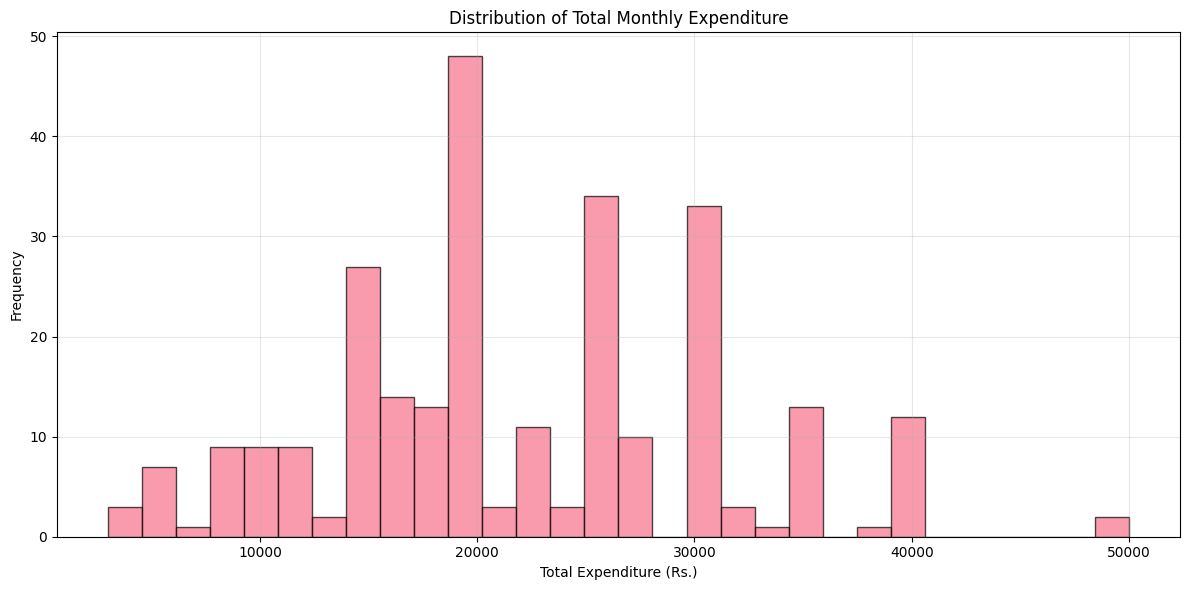

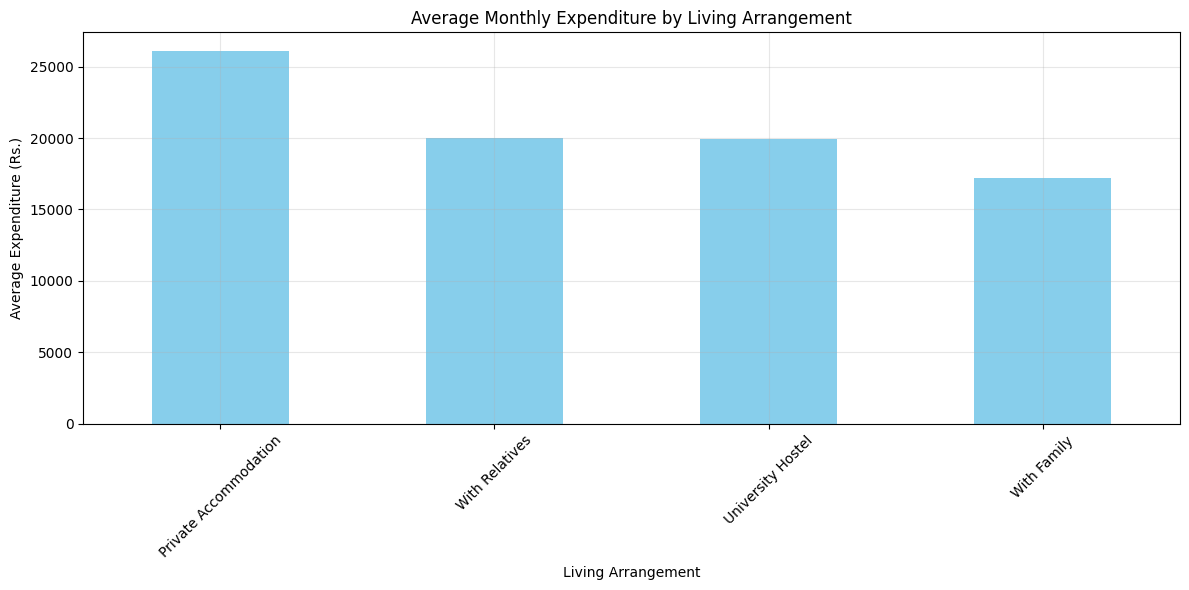

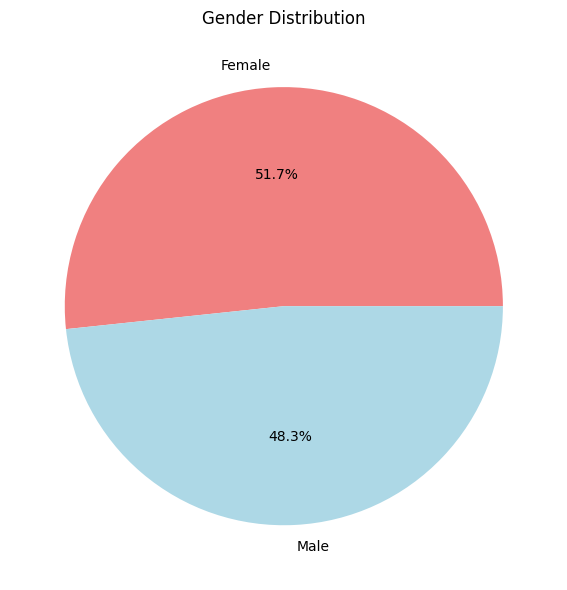

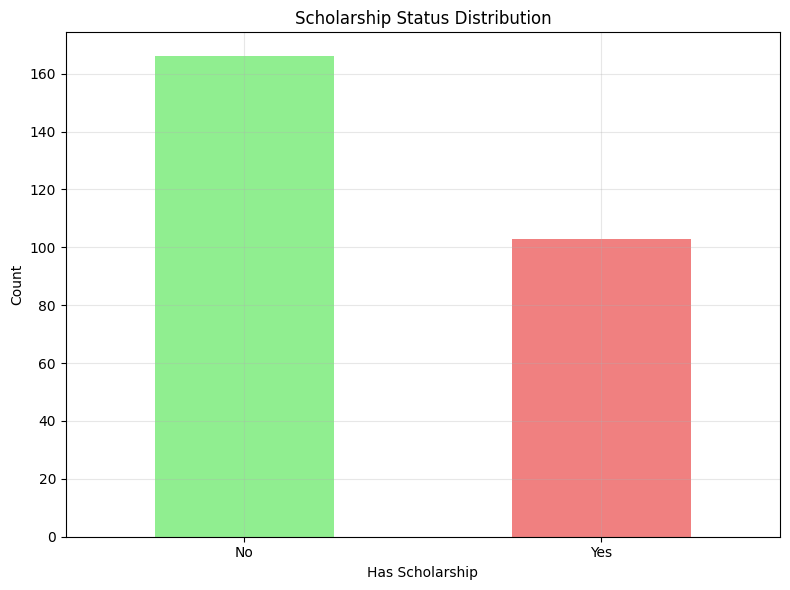

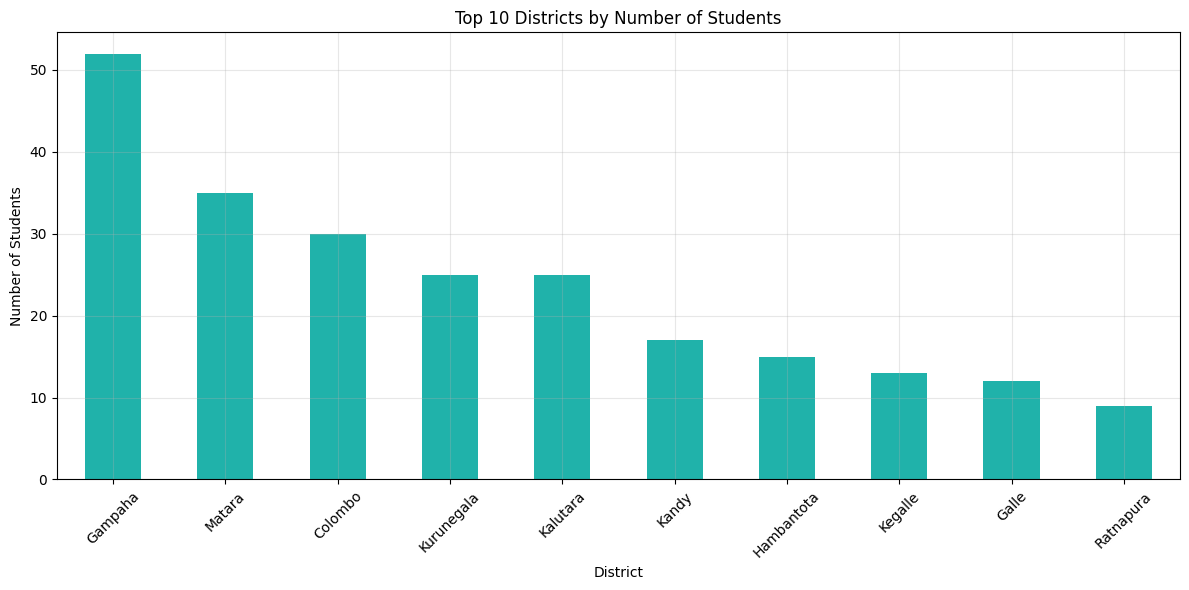

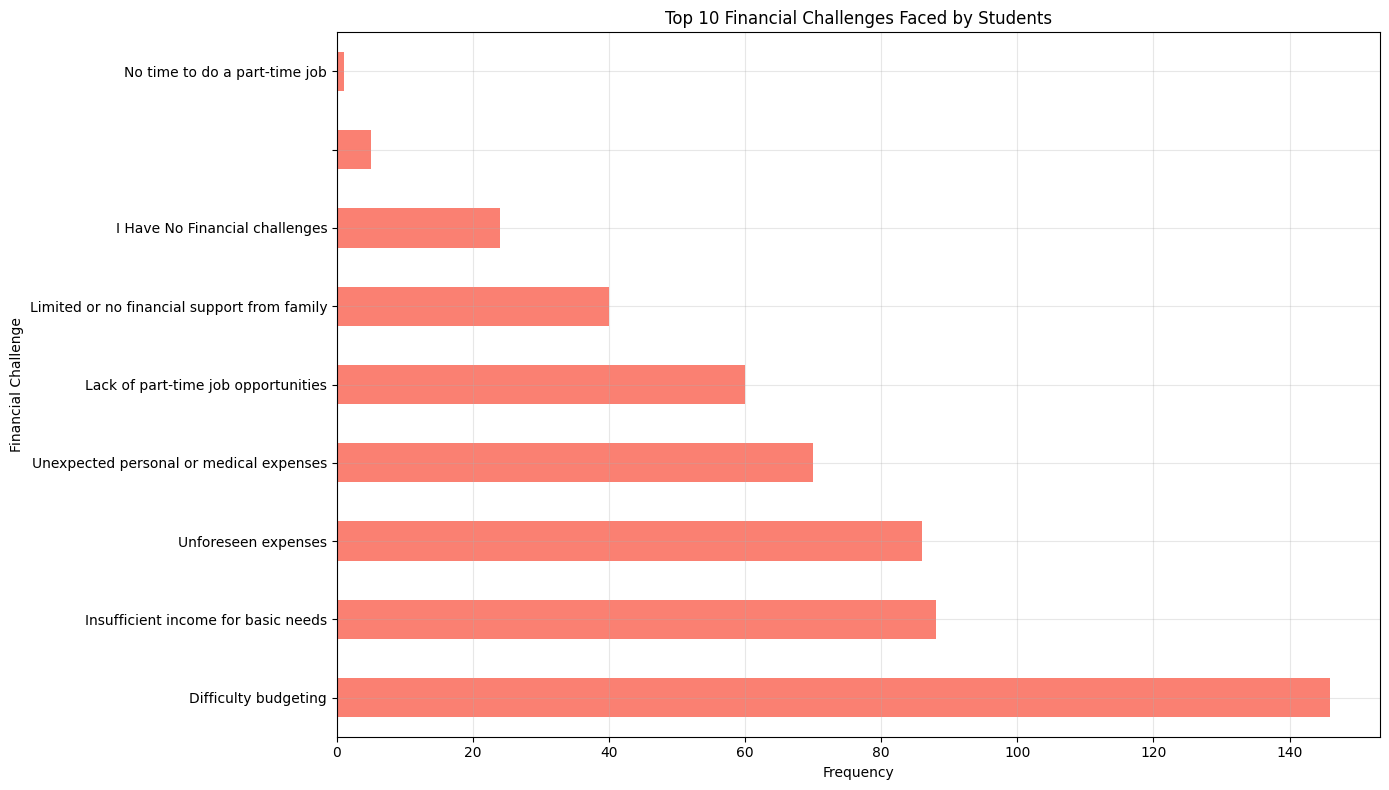

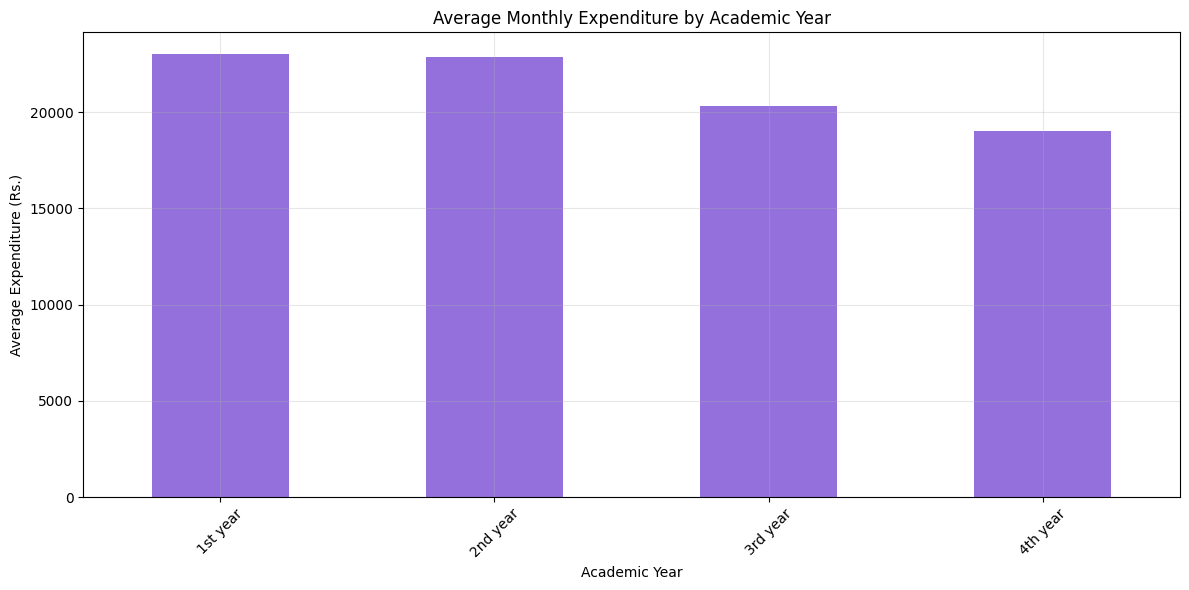

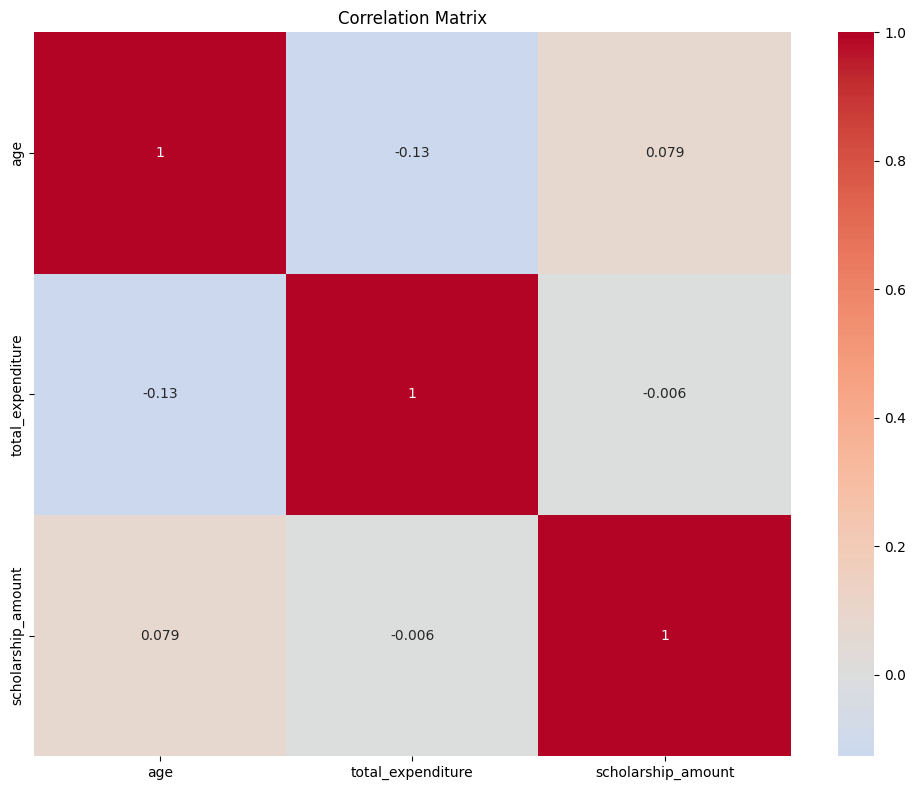

In [20]:
# Data Visualization
print("\nGenerating visualizations...")

# 1. Total Expenditure Distribution
plt.figure(figsize=(12, 6))
plt.hist(df['total_expenditure'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Monthly Expenditure')
plt.xlabel('Total Expenditure (Rs.)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Expenditure by Living Arrangement
plt.figure(figsize=(12, 6))
living_exp = df.groupby('living_arrangement')['total_expenditure'].mean().sort_values(ascending=False)
living_exp.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Expenditure by Living Arrangement')
plt.xlabel('Living Arrangement')
plt.ylabel('Average Expenditure (Rs.)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Gender Distribution
plt.figure(figsize=(8, 6))
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Scholarship Status
plt.figure(figsize=(8, 6))
scholarship_stats.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Scholarship Status Distribution')
plt.xlabel('Has Scholarship')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Top Districts
plt.figure(figsize=(12, 6))
district_dist.head(10).plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Districts by Number of Students')
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Financial Challenges
plt.figure(figsize=(14, 8))
financial_challenges.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Financial Challenges Faced by Students')
plt.xlabel('Frequency')
plt.ylabel('Financial Challenge')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Expenditure by Academic Year
plt.figure(figsize=(12, 6))
exp_by_year['mean'].plot(kind='bar', color='mediumpurple')
plt.title('Average Monthly Expenditure by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Average Expenditure (Rs.)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Correlation Analysis
numerical_data = df[['age', 'total_expenditure']].copy()
if 'scholarship_amount' in df.columns:
    numerical_data['scholarship_amount'] = df['scholarship_amount']

plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [21]:
# Additional Insights
print("\n=== ADDITIONAL INSIGHTS ===")

# Percentage of students with different living arrangements
living_percentage = (df['living_arrangement'].value_counts() / len(df)) * 100
print("\nLiving Arrangement Percentage:")
for arrangement, percentage in living_percentage.items():
    print(f"{arrangement}: {percentage:.1f}%")

# Most common financial challenge
most_common_challenge = financial_challenges.idxmax()
print(f"\nMost common financial challenge: {most_common_challenge}")

# Average expenditure difference between scholarship recipients and non-recipients
if 'Yes' in df['has_scholarship'].values:
    scholarship_exp = df[df['has_scholarship'] == 'Yes']['total_expenditure'].mean()
    no_scholarship_exp = df[df['has_scholarship'] == 'No']['total_expenditure'].mean()
    print(f"\nAverage expenditure with scholarship: Rs. {scholarship_exp:.2f}")
    print(f"Average expenditure without scholarship: Rs. {no_scholarship_exp:.2f}")
    print(f"Difference: Rs. {abs(scholarship_exp - no_scholarship_exp):.2f}")

# Expenditure comparison by district for top districts
top_districts = df['district'].value_counts().head(5).index
district_exp_comparison = df[df['district'].isin(top_districts)].groupby('district')['total_expenditure'].mean().sort_values(ascending=False)
print("\nAverage Expenditure by Top Districts:")
print(district_exp_comparison)



=== ADDITIONAL INSIGHTS ===

Living Arrangement Percentage:
Private Accommodation: 47.6%
With Family: 34.6%
University Hostel: 17.5%
With Relatives: 0.4%

Most common financial challenge: Difficulty budgeting

Average expenditure with scholarship: Rs. 21656.86
Average expenditure without scholarship: Rs. 22112.95
Difference: Rs. 456.09

Average Expenditure by Top Districts:
district
Matara        27676.470588
Kurunegala    24380.000000
Kalutara      22640.000000
Colombo       15900.000000
Gampaha       15899.038462
Name: total_expenditure, dtype: float64
